# Predicting Diamond Prices

## Phase 1: Data preparation & Visualisation

<br>


Group name: Group 27 <br>

Name & IDs of group members: 

## Table of Contents
  * [Introduction](#Introduction)
    + [Dataset Source](#Dataset-Source)
    + [Dataset Details](#Dataset-Details)
    + [Dataset Variables](#Dataset-Variables)
  * [Target Feature](#Target-Feature)
  * [Goals and Objectives](#Goals-and-Objectives)
  * [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
    + [Missing Values](#Missing-values)
    + [Incorrect Values](#Incorrect-values)
    + [Calculating and Removing Outliers](#Calculating-and-Removing-Outliers)
    + [Aggregation](#Aggregation)
    + [Renaming-Columns](#Renaming-Columns)
    + [Random Sampling](#Random-Sampling)
  * [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
    + [Univariable Visualisation](#Univariable-Visualisation)
    + [Two Variable Visualisation](#Two-Variable-Visualisation)
    + [Three Variable Visualisation](#Three-Variable-Visualisation)
  * [Summary and Conclusion](#Summary-and-Conclusion)
  * [References](#References)

# Introduction 

## Dataset Source

The 'Diamonds' dataset was used in a study conducted by Shivam Agrawal and sourced from Kaggle 2022. It analyzes almost 54,000 diamonds by their cut, colour, clarity, price and other attributes.

## Dataset Details

This dataset involves various details about diamonds to help with data analysis and visualization based on their attributes. These attributes include carat, cut, color, clarity, depth percentage, table, price, length, width and depth. These attributes make it sufficient to predict the price of diamonds through predictive modelling.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

#Name of the dataset to be imported and read
df = pd.read_csv('diamonds.csv')

print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 53940
Number of columns in the dataset: 10


These are 10 randomly generated observations from the Diamonds dataset.

In [2]:
df.sample(10, random_state=5)

,carat,cut,color,clarity,depth,table,x,y,z,price
4500,0.90,Premium,H,VS2,60.0,59.0,6.23,6.16,3.72,3629
38643,0.33,Ideal,F,VVS2,61.9,56.0,4.46,4.42,2.75,1040
4924,0.90,Good,H,SI1,57.1,56.0,6.33,6.28,3.60,3726
38167,0.34,Ideal,G,IF,60.1,57.0,4.54,4.58,2.74,1014
1937,0.90,Good,E,SI2,64.1,57.0,6.09,6.07,3.90,3084
34265,0.31,Premium,J,SI1,60.9,60.0,4.38,4.36,2.66,465
21774,1.51,Very Good,G,SI1,62.9,58.0,7.25,7.28,4.57,9841
4061,0.34,Very Good,E,SI2,63.1,56.0,4.51,4.46,2.83,571
10715,0.31,Good,D,SI2,63.7,55.0,4.35,4.32,2.76,593
9527,1.02,Very Good,H,SI1,63.0,58.0,6.34,6.40,4.01,4617


## Dataset Variables

The attributes of each column in this dataset are described in this table.

#### Table 1: Description of features in this dataset

| Name | Data type | Units | Description | 
| :-- | :-- | :-- | :-- |
| Index counter | Discrete Numeric | NA | Index of each diamond |
| Carat | Continuous Numeric | Carats | Carat weight of diamond (1 carat = 0.20g) |
| Cut | Ordinal Categorical | NA | Quality of cut; Increasing order: Fair, Good, Very Good,Premium, Ideal |
| Color | Ordinal Categorical | NA | Colour grade of diamond; (best)D, E, F, G, H, I, J(worst) |
| Clarity | Ordinal Categorical | NA | How obvious inclusions(small imperfections) are within the diamonds. List from best to worst: <br> <b>IF:</b> flawless <br><b>VVS1 or VVS2:</b> Very Very Slightly Included <br> <b>VS1 or VS2:</b> Very Slightly Included <br> <b>SI1 or SI2</b>: Slightly Included <br> <b>I1 or I2</b>:Included|
| Table | Continuous Numeric | Percentage | width of the diamond's table(facet seen when diamond is viwed face up) relative to it's widest point |
| price | Continuous Numeric | US dollars | cost of the diamond |
| x | Continuous Numeric | Millimeter | length of the diamond |
| y | Continuous Numeric | Millimeter | width of the diamond |
| z | Continuous Numeric | Millimeter | depth of the diamond |
| Depth | Continuous Numeric | percentage | Depth percentage measured from the cutlet(flat face at the bottom of the gemstone) to the table, divided by its girdle(line that separates the crown from the pavilion of the edge of a diamond) diameter |

# Target Feature

The aim of this report is to investigate how a range of different variable can impact the perceive value of a diamond. Therefore, the Target feature for this project will be price of diamonds in US dollars, as it's a direct representation of its value. 

# Goals and Objectives

Throughout history, people have been drawn to exquisite and unique items. Diamonds are regarded as the pinnacle of luxury in jewelery, as they have been prized as jewels from ancient times and are admired for their brilliance. Diamonds are treasured for much more than just their alluring beauty, though. They have different qualities that allow people to use it for many different purposes such as a cutting tool, and other tasks requiring durability. This makes diamonds valued beyond all other stones due to their distinctive physical characteristics and are the most popular gemstone in the world.

Because of these different aspects that discussed previously, a predictive model for diamonds' prices would have many practical use and applications in the real world. For example, it could help buyers determine if the price of a singular diamond is reasonable. Potential sellers of jewelry could also use this model to predict an estimate of the price of their diamond.

There are 2 main objectives in this project. The first one is to predict the price of diamonds based on a number of different features, and which features appear to be the greatest indicators or predictors of the diamonds' prices. In addition to that, after some data preprocessing and preparation, which is the focus of this Phase 1 report, the second goal is to undertake some exploratory data analysis using basic descriptive statistics and data visualisation plots to obtain some insight into the patterns and correlations existent in the data.

At this stage, our presumption is that our dataset's rows are not associated. That is, we are assuming that the price of a certain diamond doesn't affect the price of another in this dataset. By making this assumption, we are able to utilize traditional predictive models such as multiple linear regression.

# Data Cleaning and Preprocessing

This process aims to identify data quality issues and transform the data accordingly to ensure that the raw that is suitable for processing and analytics such as predictive modeling, increasing the validity of the data. Data cleaning and preprocessing undertaken for this project include:
- Check for missing values, and removing rows accordingly
- Identify and remove any incorrect values such as outliers
- Data aggregation including encoding categorical columns
- Check columns names and modify is necessary

Let's first display all columns in the dataset

In [3]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

## Missing Values 

In [4]:
#check for missing values here 
print("Number of missing values for each column:")
df.isnull().sum()

Number of missing values for each column:


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

As there are no null or missing values in this dataset, no rows will need to be dropped for this step.

## Incorrect Values

The aim of this step is to identify values that are Inherently incorrect, such as negative values or outliers 

### Numerical

In [5]:
#check for outliers
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


Through analysing the summary of numerical features for this dataset, we are able to identify that no feature has a negative value as all the minimum values are greater or equal to zero. However, further examination of individual values from table 2 indicate that existence of outliers for the following columns:
- carat
- price
- x
- y
- z

This was identified through examining the minimum and maximum values of each column and comparing it its mean, as a minimum or maximum value that have a large gap from its mean may indicate the presence of outliers.

### Categorical

In [6]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
df.describe(include='object').T


,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


In [7]:
categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(df[col].unique())

Unique values for cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values for color
['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values for clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


As there the unique values to of each column matches the expected values as highlighted in table 1 where each columns is described, there does not seem to be any outliers for the categorical columns in this dataset.

## Calculating and Removing Outliers

### Numerical

In [8]:
#calculating whisker for carat
iqr_c = 1.04 - 0.40
lowerwhisker_c = 0.40 - 1.5*iqr_c
upperwhisker_c = 1.04 + 1.5*iqr_c
print(f"Lower whisker: {lowerwhisker_c}, Upper whisker: {upperwhisker_c}")

df = df[(df['carat'] > lowerwhisker_c) & (df['carat'] < upperwhisker_c)]

Lower whisker: -0.5599999999999999, Upper whisker: 2.0


In [9]:
#calculating whisker for length
iqr_x = 6.54 - 4.71
lowerwhisker_x = 4.71 - 1.5*iqr_x
upperwhisker_x = 6.54 + 1.5*iqr_x
print(f"Lower whisker: {lowerwhisker_x}, Upper whisker: {upperwhisker_x}")

df = df[(df['x'] > lowerwhisker_x) & (df['x'] < upperwhisker_x)]

Lower whisker: 1.9649999999999999, Upper whisker: 9.285


In [10]:
#calculating whisker for width
iqr_y = 6.54 - 4.72
lowerwhisker_y = 4.72 - 1.5*iqr_y
upperwhisker_y = 6.54 + 1.5*iqr_y
print(f"Lower whisker: {lowerwhisker_y}, Upper whisker: {upperwhisker_y}")

df = df[(df['y'] > lowerwhisker_y) & (df['y'] < upperwhisker_y)]

Lower whisker: 1.9899999999999993, Upper whisker: 9.27


In [11]:
#calculating whisker for depth

iqr_z = 4.04 - 2.91
lowerwhisker_z = 2.91 - 1.5*iqr_z
upperwhisker_z = 4.04 + 1.5*iqr_z
print(f"Lower whisker: {lowerwhisker_z}, Upper whisker: {upperwhisker_z}")

df = df[(df['z'] > lowerwhisker_z) & (df['z'] < upperwhisker_z)]

Lower whisker: 1.2150000000000003, Upper whisker: 5.734999999999999


In [12]:
#calculating whisker for price
iqr_p = 5324.25 - 950.0
lowerwhisker_p = 5324.25 - 1.5*iqr_p
upperwhisker_p = 950.0 + 1.5*iqr_p
print(f"Lower whisker: {lowerwhisker_p}, Upper whisker: {upperwhisker_p}")

df = df[(df['price'] > lowerwhisker_p) & (df['price'] < upperwhisker_p)]

Lower whisker: -1237.125, Upper whisker: 7511.375


In [13]:
df.describe(include=['int64','float64']).T 

,count,mean,std,min,25%,50%,75%,max
carat,45514.0,0.651037,0.315449,0.20,0.36,0.56,0.91,1.96
depth,45514.0,61.759848,1.427645,43.00,61.10,61.80,62.50,79.00
table,45514.0,57.390460,2.237125,43.00,56.00,57.00,59.00,79.00
x,45514.0,5.416562,0.883230,3.73,4.59,5.30,6.22,8.10
y,45514.0,5.419919,0.876001,3.68,4.59,5.30,6.22,8.05
z,45514.0,3.346268,0.548090,2.06,2.82,3.26,3.86,5.12
price,45514.0,2490.446895,1912.847077,326.00,861.00,1819.00,3897.00,7511.00


## Aggregation

In [14]:
#encoding cut
cut = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
df['cut'].replace(cut, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,4,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [15]:
#encoding color
color = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
df['color'].replace(color, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,4,5,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,5,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,5,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,1,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,0,SI2,63.3,58.0,4.34,4.35,2.75,335


In [16]:
#encoding clarity
clarity = {'I2': 0, 'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'].replace(clarity, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,4,5,2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,5,3,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,5,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,1,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,0,2,63.3,58.0,4.34,4.35,2.75,335


In [17]:
print(f"This is the dataset shape: {df.shape} \n")
print(f"These are the data types; 'object' stands for string type:")
print(df.dtypes)

This is the dataset shape: (45514, 10) 

These are the data types; 'object' stands for string type:
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


## Renaming Columns

In [18]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [19]:
#Changing name of columns
df.columns = df.columns.str.lower().str.strip()

columns_mapping = {
    'depth': 'depth percentage',
    'x': 'length',
    'y': 'width',
    'z': 'depth',
}

df = df.rename(columns = columns_mapping)
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth percentage,table,length,width,depth,price
6970,1.00,0,2,3,56.3,63.0,6.63,6.61,3.73,4150
39891,0.42,3,4,5,61.8,59.0,4.83,4.81,2.98,1103
32070,0.33,3,6,3,60.4,60.0,4.46,4.41,2.68,780
10290,1.00,1,3,3,57.2,59.0,6.66,6.62,3.80,4758
12340,1.01,3,5,3,60.5,62.0,6.50,6.46,3.92,5226


## Random Sampling

In [20]:
df = df.sample(n=1500, random_state=5)
df.shape
df.sample(5, random_state=5)

,carat,cut,color,clarity,depth percentage,table,length,width,depth,price
2106,0.90,1,4,2,63.2,59.0,6.06,6.13,3.85,3116
11550,1.07,4,2,3,60.9,57.0,6.61,6.68,4.05,5031
38300,0.37,4,0,5,62.6,57.0,4.54,4.57,2.85,487
40447,0.51,4,4,2,61.1,56.0,5.18,5.21,3.17,1139
45468,0.50,4,5,4,62.9,55.0,5.11,5.07,3.20,1676


# Data Exploration and Visualisation

## Univariable Visualisation

### Histogram of diamond length

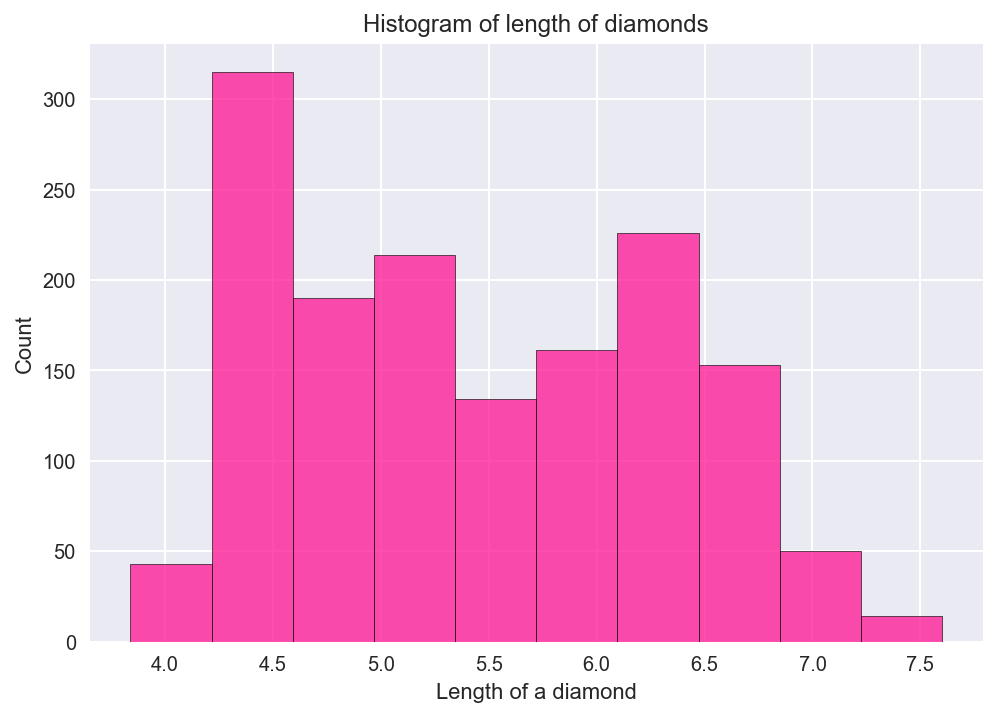

In [21]:
sns.histplot(df['length'], bins= 10, color='deeppink')
plt.xlabel ("Length of a diamond")
plt.ylabel ("Count")
plt.title("Histogram of length of diamonds")
plt.show()

### Boxplot of price of diamond

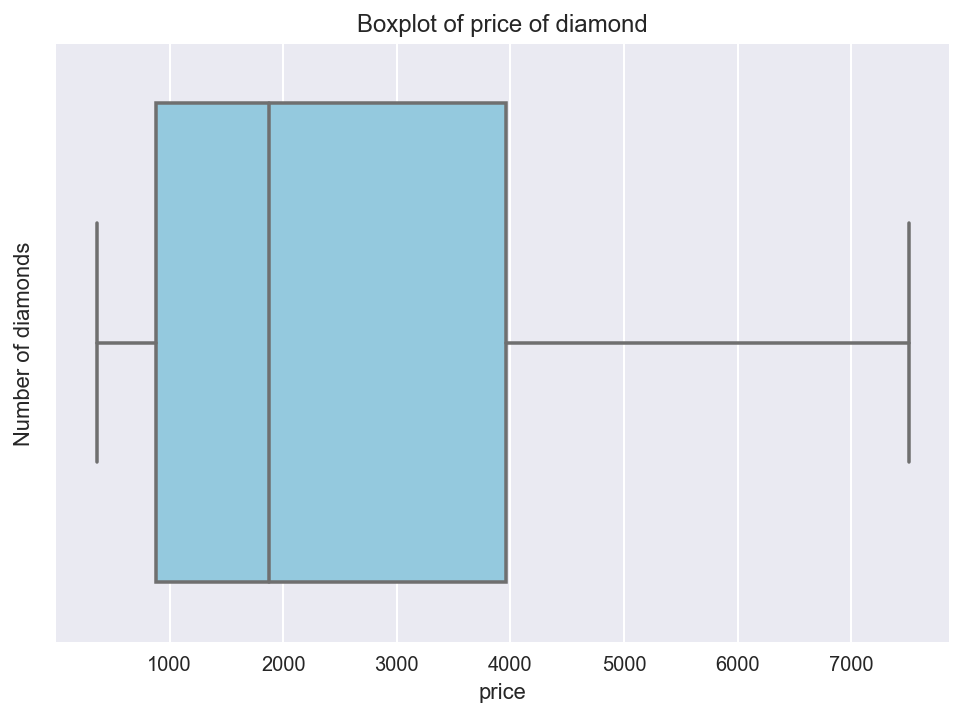

In [22]:
plt.title("Boxplot of price of diamond")
sns.boxplot(df['price'], color='skyblue')
plt.xlabel('price')
plt.ylabel('Number of diamonds')
plt.show()

### Histogram of clarity of diamond grade

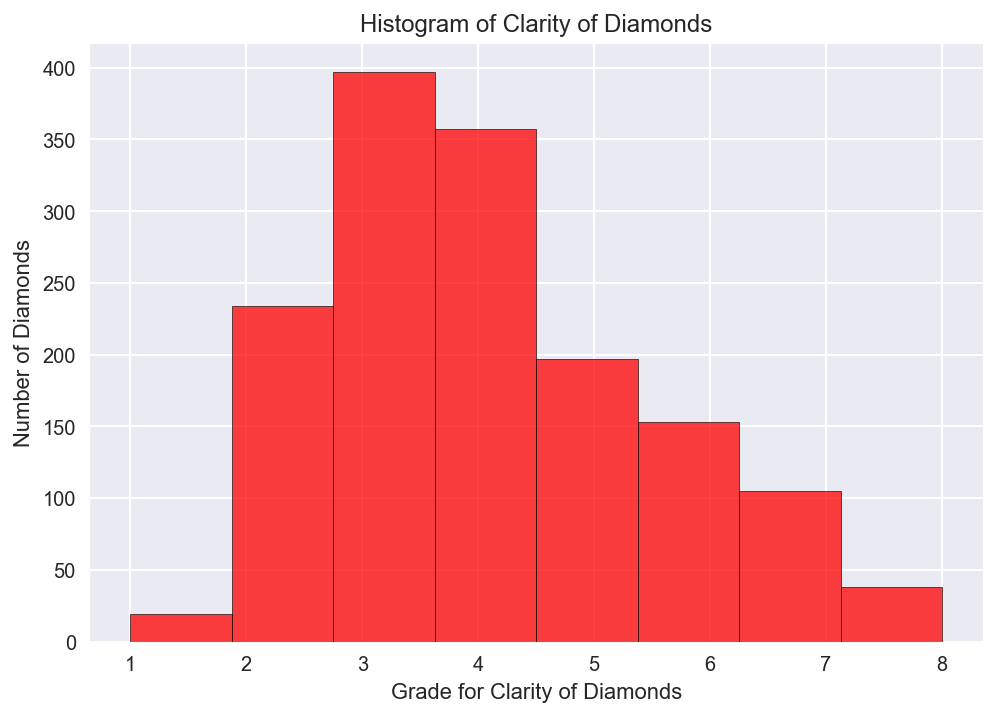

In [23]:
plt.title("Histogram of Clarity of Diamonds")
sns.histplot(df['clarity'], bins=8, color='red')
plt.xlabel("Grade for Clarity of Diamonds")
plt.ylabel("Number of Diamonds")
plt.show()

### Histogram of carat

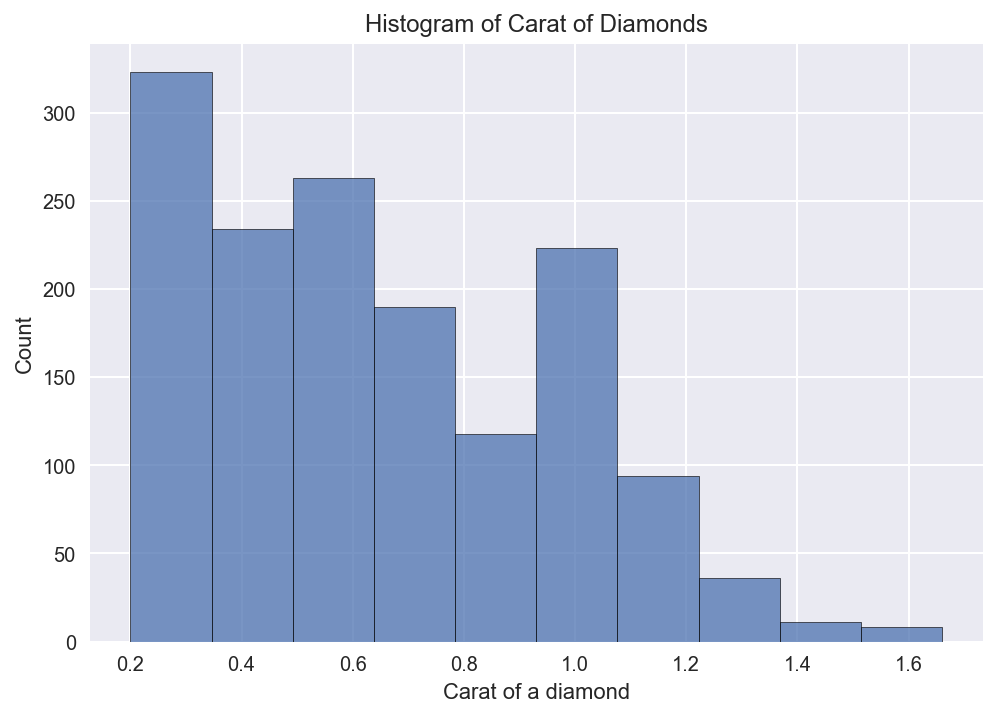

In [24]:
sns.histplot(df['carat'], bins = 10)
plt.xlabel("Carat of a diamond")
plt.ylabel("Count")
plt.title("Histogram of Carat of Diamonds")
plt.show();

### Boxplot of cut grade

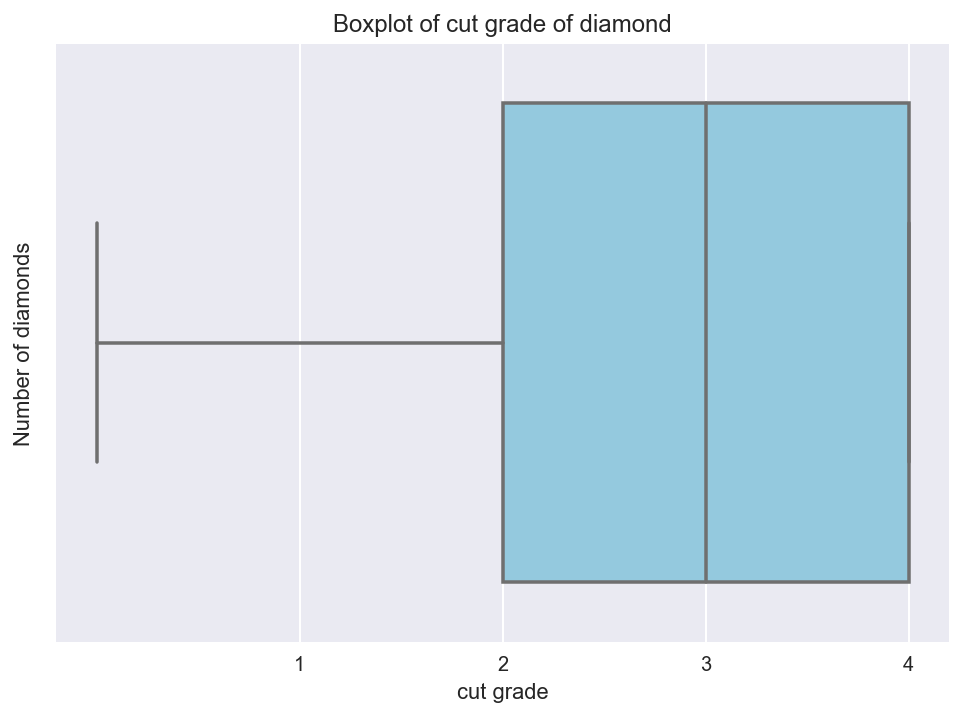

In [25]:
plt.title("Boxplot of cut grade of diamond")
sns.boxplot(df['cut'], color='skyblue')
plt.xlabel('cut grade')
plt.ylabel('Number of diamonds')
plt.xticks([1, 2, 3, 4])

plt.show()

### Histogram of color grade

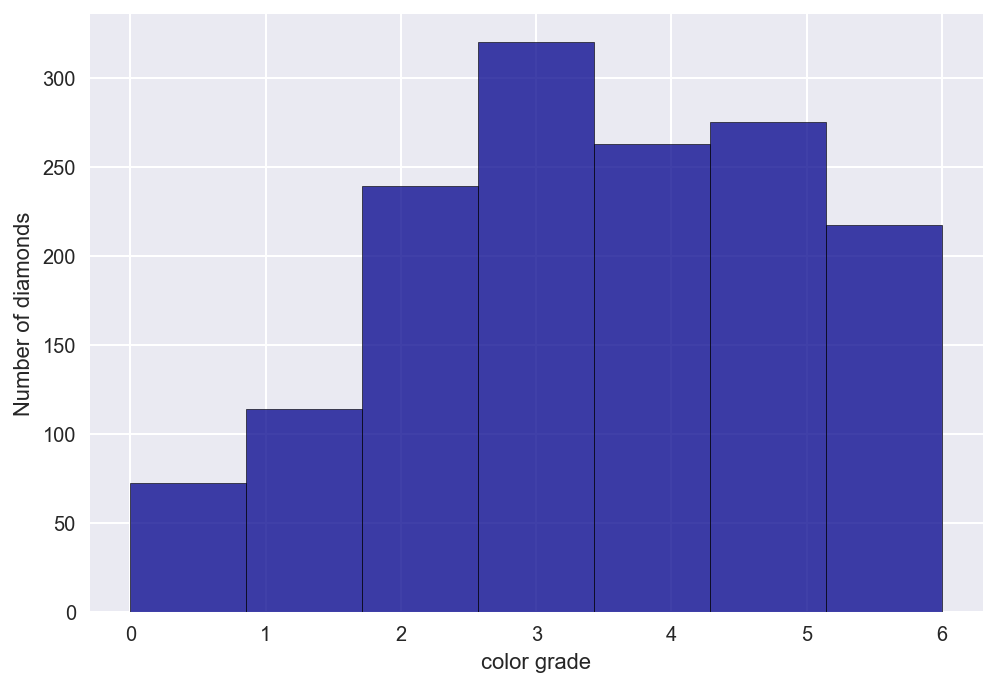

In [26]:
sns.histplot(df['color'], bins = 7,color='darkblue')
plt.xlabel('color grade')
plt.ylabel('Number of diamonds')
plt.show()

## Two Variable Visualisation

### Scatterplot of price of diamonds according to their length

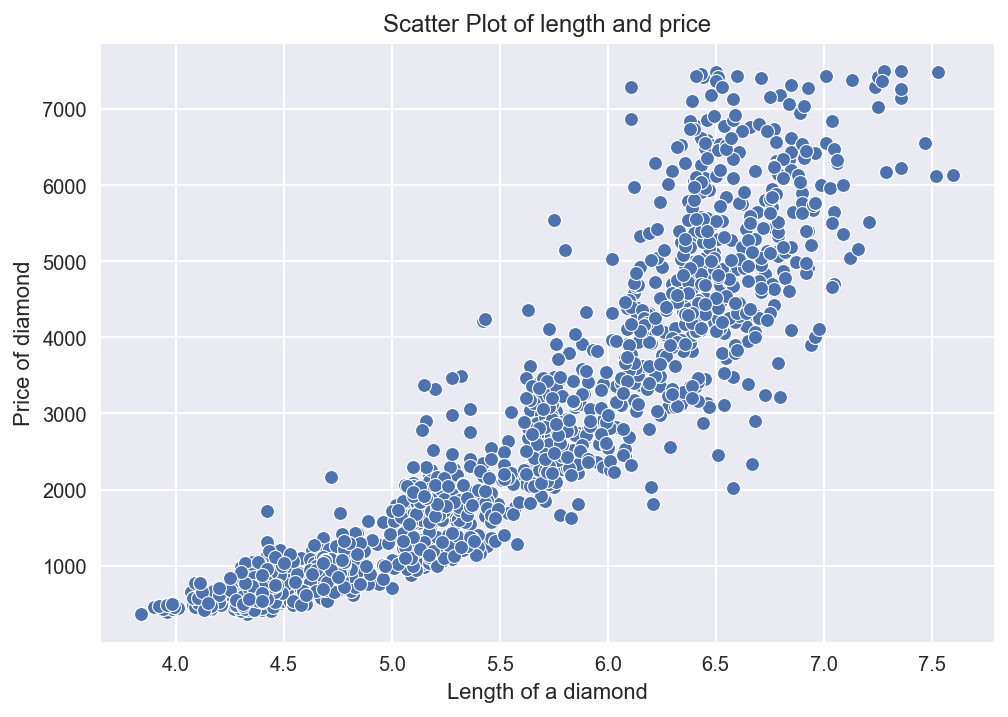

In [27]:
sns.scatterplot(df['length'], df['price'])
plt.xlabel("Length of a diamond")
plt.ylabel("Price of diamond")
plt.title("Scatter Plot of length and price")
plt.show();

<AxesSubplot:title={'center':'Boxplot or price grouped by clarity'}, xlabel='clarity', ylabel='price'>

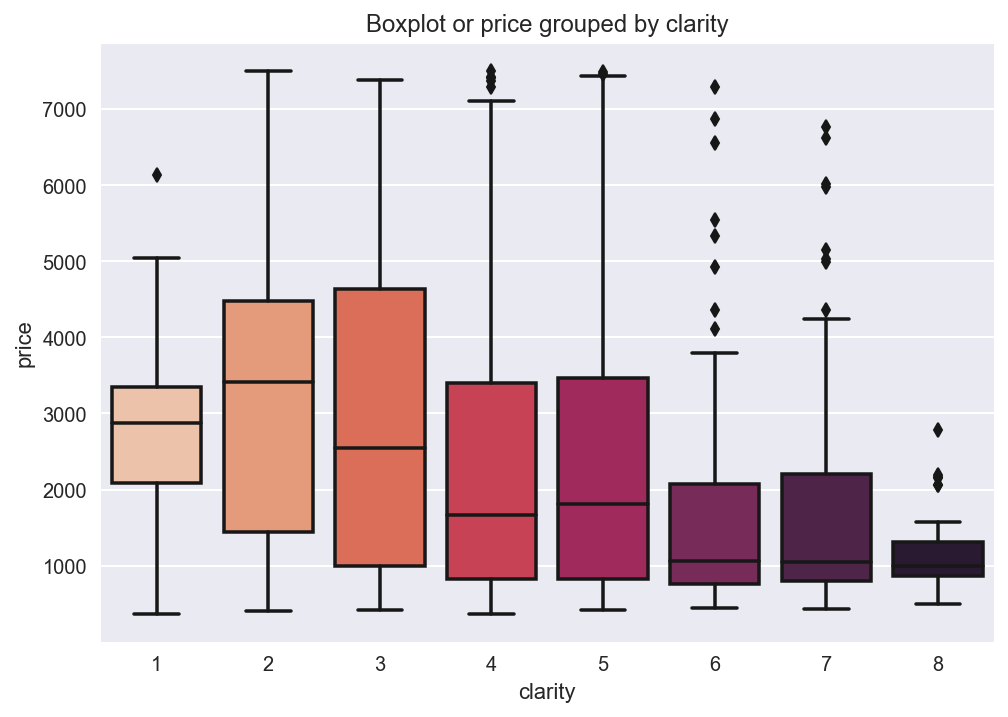

In [28]:
plt.title("Boxplot or price grouped by clarity")
sns.boxplot(x="clarity", y="price", data=df, palette="rocket_r")

### Scatterplot of table and depth percentage against price

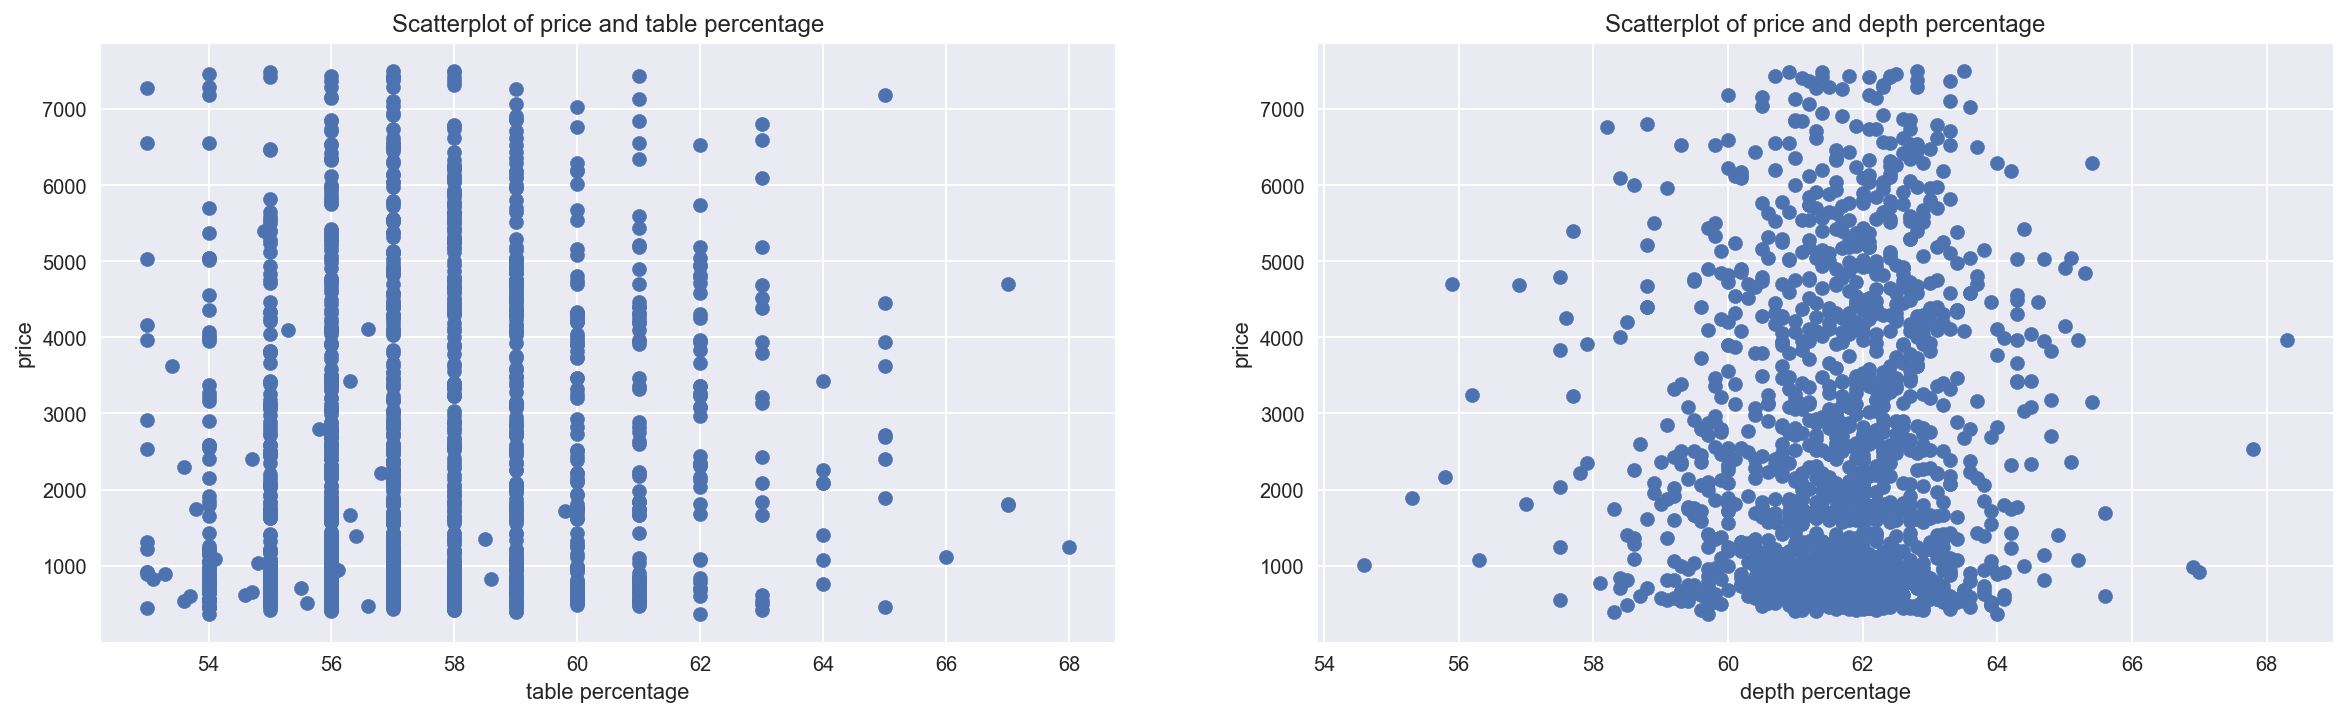

In [29]:
fig = plt.figure()
fig.set_figwidth(20)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)



ax1.scatter(df['table'], df['price'])
ax1.set_title('Scatterplot of price and table percentage')
ax1.set_xlabel('table percentage')
ax1.set_ylabel('price')


ax2.scatter(df['depth percentage'], df['price'])
ax2.set_title('Scatterplot of price and depth percentage')
ax2.set_xlabel('depth percentage')
ax2.set_ylabel('price')
plt.show()

Text(0.5, 1.0, 'Plot of carrat and price of the diamond')

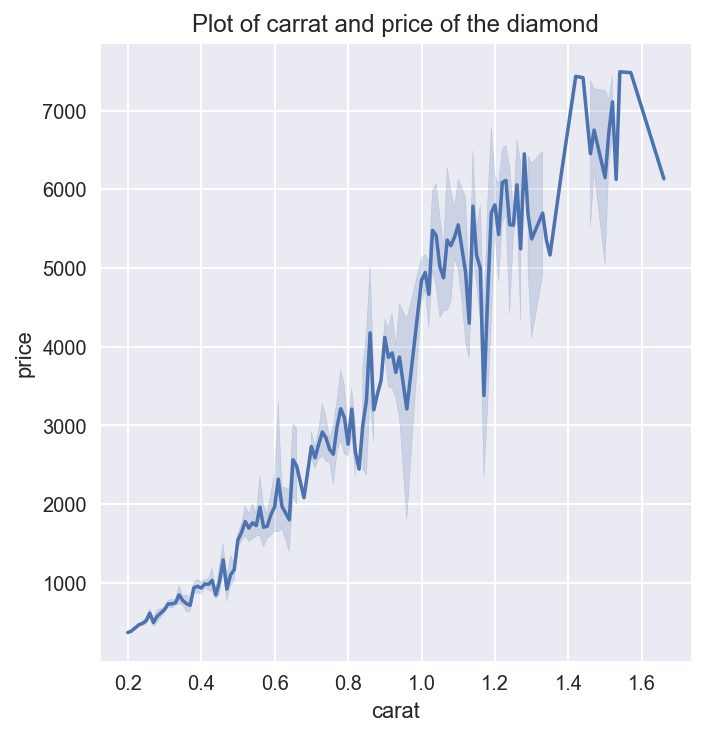

In [30]:
#alternate version 
sns.relplot(data=df, x="carat", y="price", kind="line")
plt.title('Plot of carrat and price of the diamond')

In [ ]:
### 

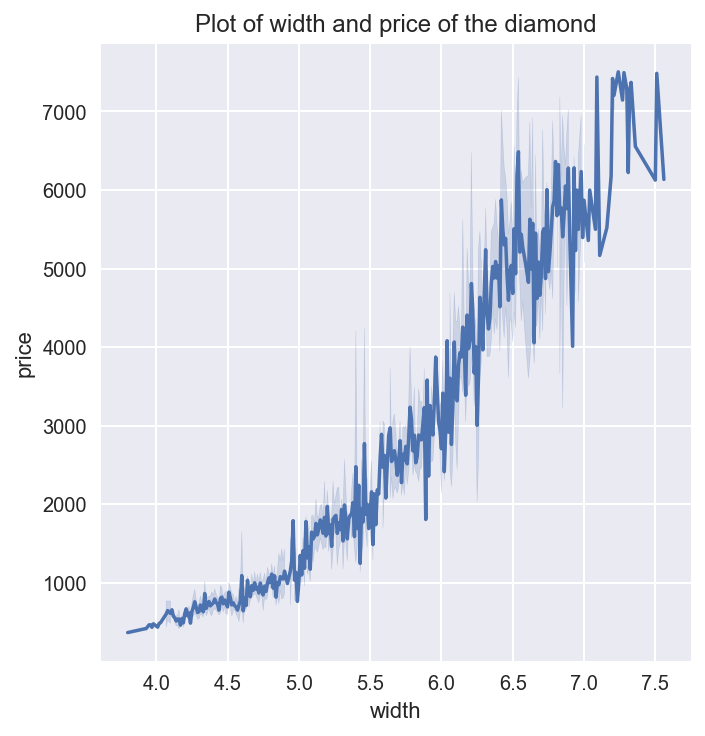

In [37]:
sns.relplot(data=df, x=df['width'], y=df['price'], kind="line")
plt.title('Plot of width and price of the diamond')
plt.show();

## Three Variable Visualisation

### Scatter plot of price of diamonds depending on its length and categorised by color

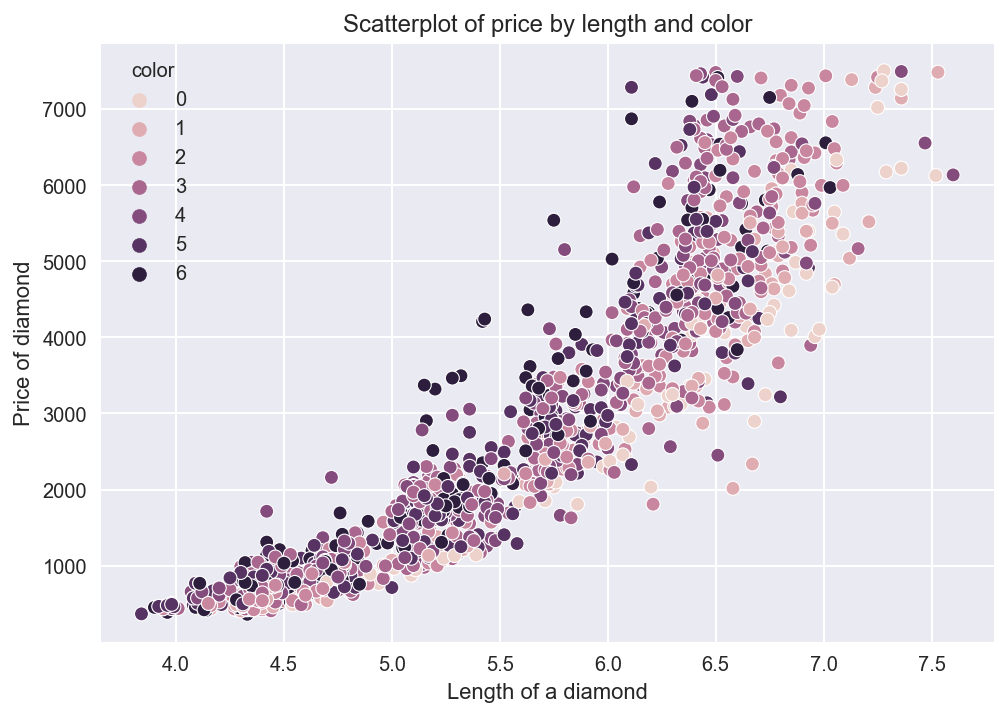

In [31]:
sns.scatterplot(df['length'], df['price'], hue = df['color'])
plt.title("Scatterplot of price by length and color")
plt.xlabel("Length of a diamond")
plt.ylabel("Price of diamond")
plt.show();

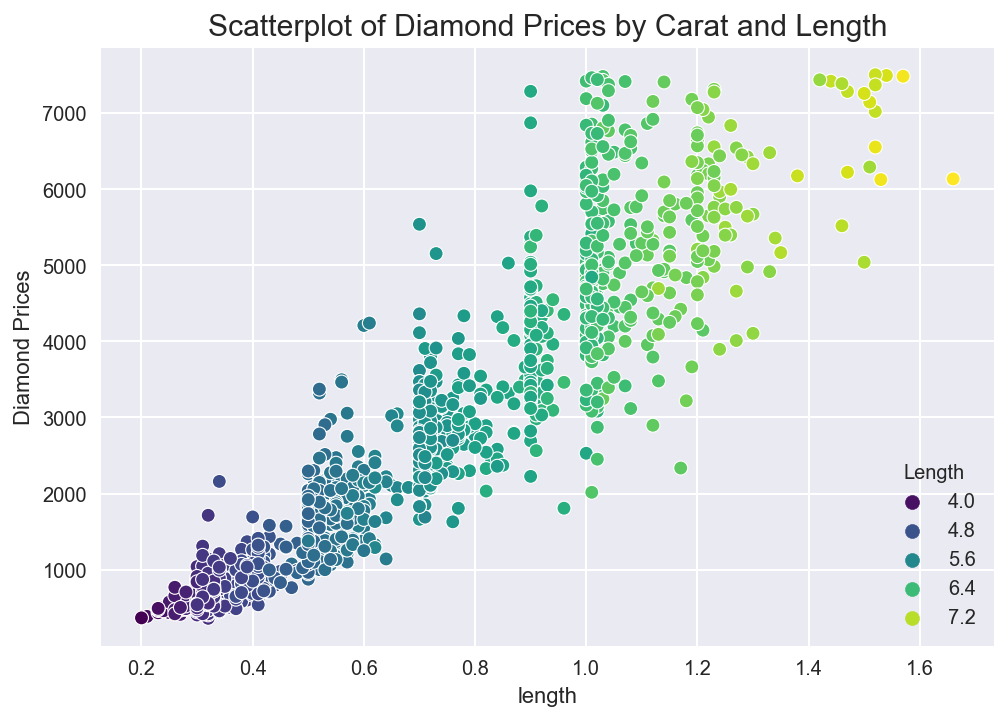

In [32]:
sns.scatterplot(df['carat'], df['price'], hue = df['length'], data = df, palette="viridis")
plt.title('Scatterplot of Diamond Prices by Carat and Length', fontsize = 15)
plt.xlabel('length')
plt.ylabel('Diamond Prices')
plt.legend(loc='lower right', title='Length')
plt.show();

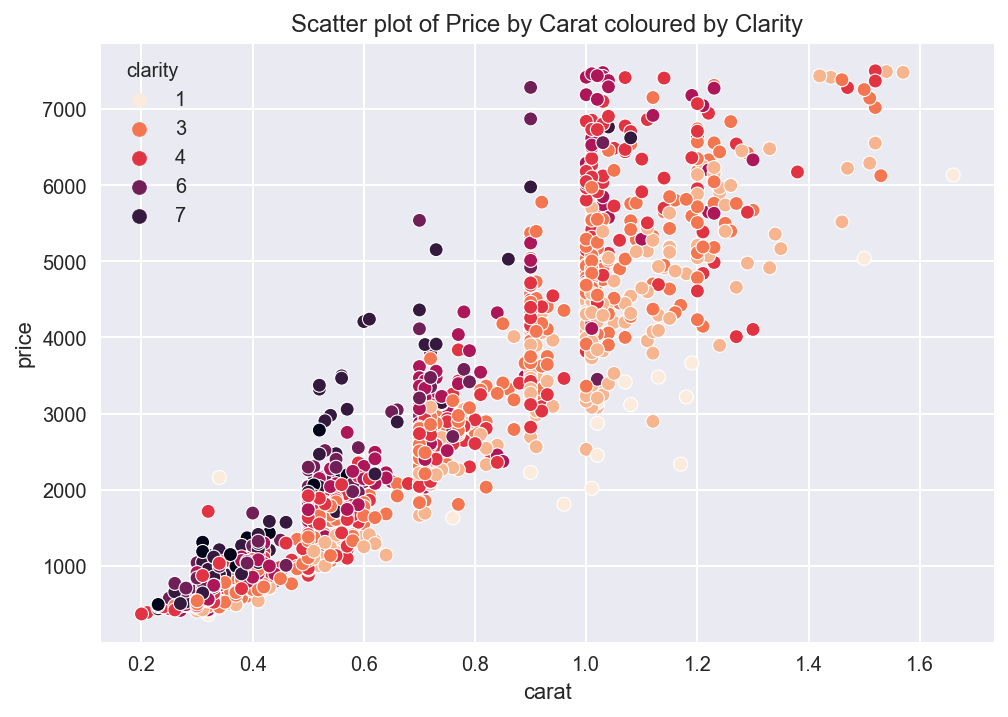

In [33]:
sns.scatterplot(df['carat'], df['price'], hue = df['clarity'], palette="rocket_r")
plt.title("Scatter plot of Price by Carat coloured by Clarity")
plt.show();

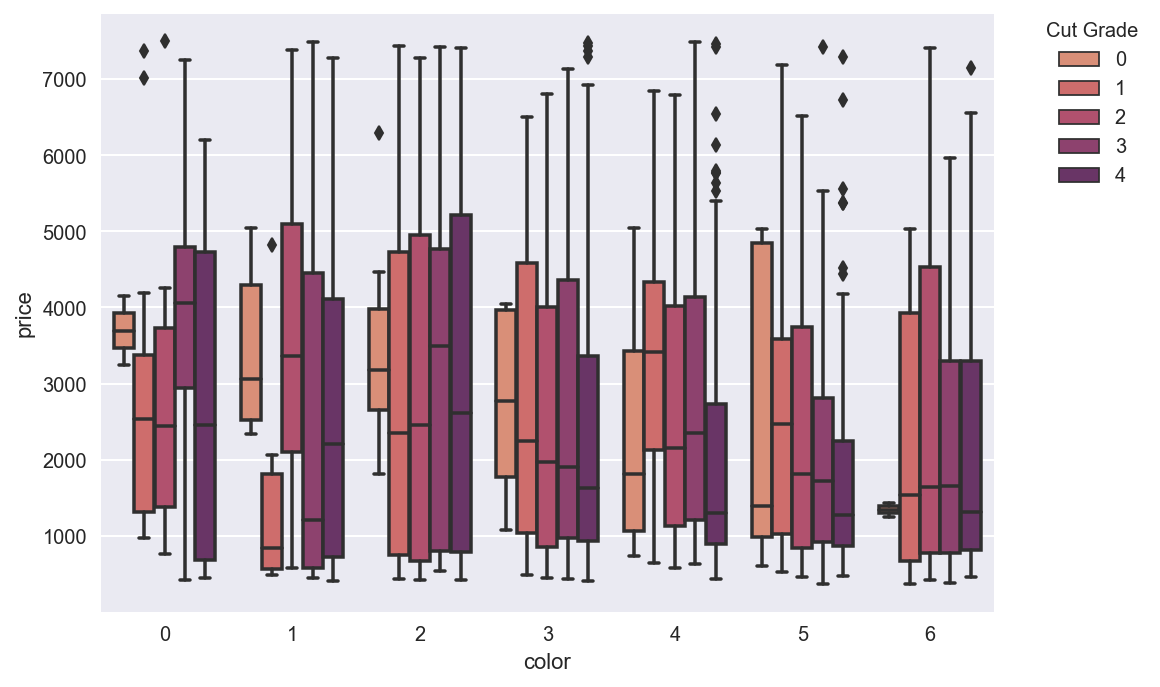

In [34]:
x = sns.boxplot(df['color'], df['price'], hue = df['cut'], palette="flare")

x.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,
          title="Cut Grade");

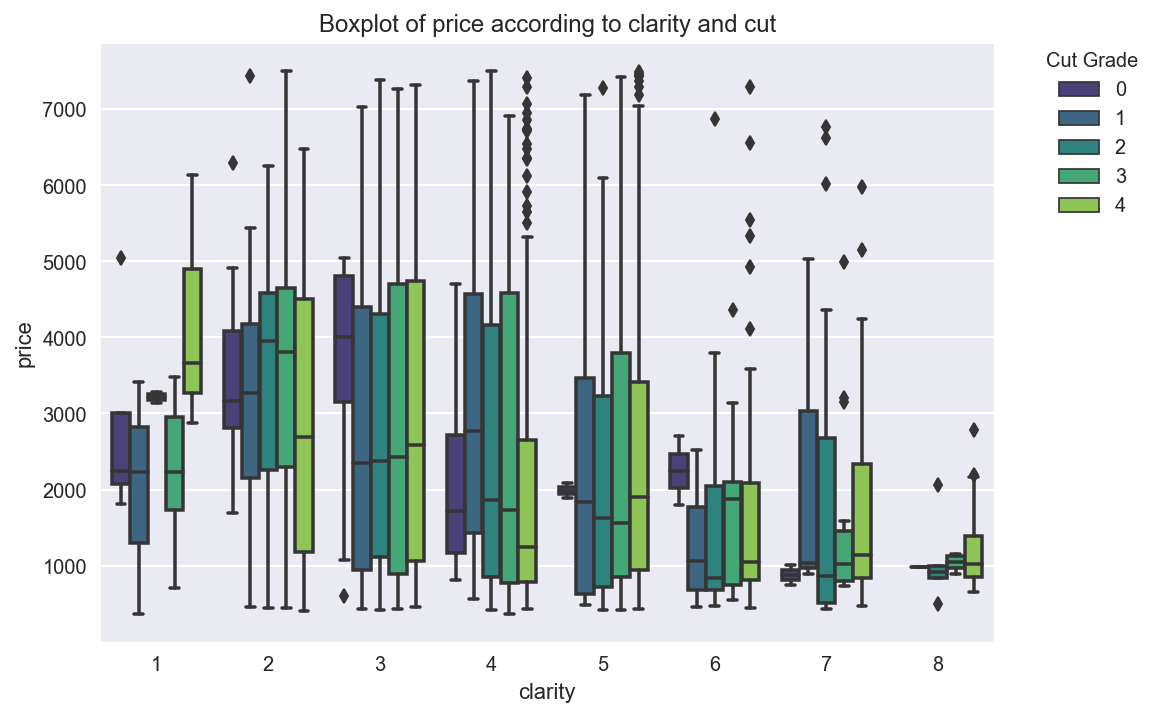

In [35]:
bp=sns.boxplot(x=df['clarity'],
               y=df['price'],
               hue=df['cut'], 
               data=df, palette="viridis");

bp.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,
          title="Cut Grade");

plt.title("Boxplot of price according to clarity and cut");

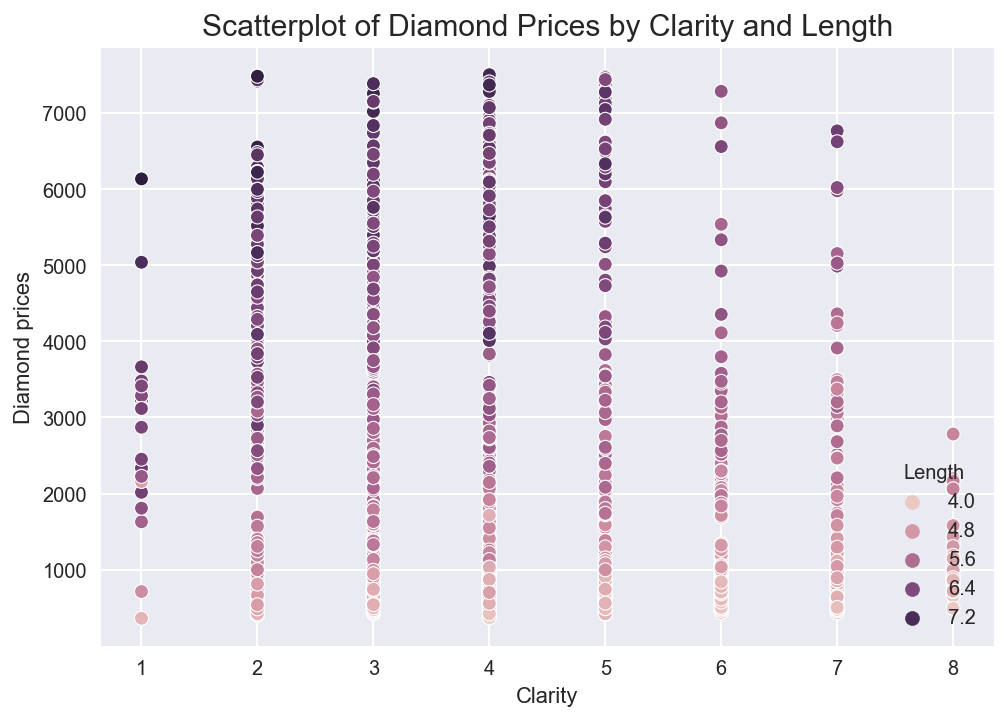

In [36]:
sns.scatterplot(df['clarity'], df['price'], hue = df['length'], data = df)
plt.title('Scatterplot of Diamond Prices by Clarity and Length', fontsize = 15);
plt.xlabel('Clarity')
plt.ylabel('Diamond prices')
plt.legend(loc='lower right', title='Length')
plt.show();

# Summary and Conclusion

add the summary here

# References

Uses of diamonds - Mining for schools. (n.d.). <br> Www.miningforschools.co.za. https://www.miningforschools.co.za/lets-explore/diamond/uses-of-diamonds

‌